# Lecture 4

In this lecture we will talk more about NumPy and introduce Matplotlib.

The material covers more parts from the NumPy User Manual [4] as well parts of the Matplotlib User Guide [5].

## Working with NumPy

In Lecture 3 we introduced NumPy and the basic NumPy array.

Now it's time to start working with these!


The first thing to note is that when working with NumPy *arrays*, operations are _per element_

In [1]:
import numpy as np
a = np.arange(4)
b = a + 1
c = a + b
print("a = {}".format(a))
print("b = {}".format(b))
print("c = {}".format(c))

a = [0 1 2 3]
b = [1 2 3 4]
c = [1 3 5 7]


Even when multiplying, NumPy array are processed element-by-element when possible

In [2]:
a = np.arange(4)
b = np.linspace(1, 2.5, 4)
c = a * b
print("a = {}".format(a))
print("b = {}".format(b))
print("c = {}".format(c))

a = [0 1 2 3]
b = [ 1.   1.5  2.   2.5]
c = [ 0.   1.5  4.   7.5]


Note that NumPy automatically assignes *one* type to each array, and automatically promotes the results of array operations to the proper type.

In [3]:
print(type(a[0]), type(b[0]), type(c[0]))

<class 'numpy.int64'> <class 'numpy.float64'> <class 'numpy.float64'>


If shapes of operands are incompatible, NumPy will give you an error:

In [4]:
b = np.linspace(1, 2, 3)
c = a * b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

We will show how to perform different types of vector (and matrix) operations on NumPy objects below

### Indexing and slicing

In many algorithms you need to work on parts of an array, i.e. only selected entries will be used.

* When we talk about *indexing* we are choosing data for specific indexes out of an array
* For indexing, you can use Python lists or NumPy arrays as *index arrays*

In [5]:
a = np.linspace(1., 10., 7)
index = np.array([0, 2, 3])

print("a = {}".format(a))
print("index = {}".format(index))
print()
print(a[0])          # Single element
print(a[ [0, 2, 3] ])# Indexing with index array - Python list
print(a[index])      # Indexing with index array - NumPy array

a = [  1.    2.5   4.    5.5   7.    8.5  10. ]
index = [0 2 3]

1.0
[ 1.   4.   5.5]
[ 1.   4.   5.5]


* When we talk about *slicing* we are choosing specific data *continuously* or in a *regular pattern*

In [6]:
print(a[0:2])        # Slicing: Elements from (and including) no. 0 to no. 2 (not including)
print(a[::2])        # Slicing: Every second element from start to end
print(a[:0:-1])      # Slicing: Every element _except_ the first one, in reverse order

[ 1.   2.5]
[  1.   4.   7.  10.]
[ 10.    8.5   7.    5.5   4.    2.5]


* You can also use arrays of Booleans as "mask" arrays to choose specific values

In [7]:
mask = a > 4
print(mask)
print(a[mask])

[False False False  True  True  True  True]
[  5.5   7.    8.5  10. ]


* NumPy arrays can be of _any_ dimension, indexing follows the same pattern as for one dimension. Different dimensions are separated with a comma (**,**)

In [8]:
a = np.arange(24).reshape(3, 2, 4)
print("a = \n{}".format(a))
print()
print("a[0,:,:] = \n{}".format(a[0,:,:]))    # "part 0"
print()
print("a[:,1,:] = \n{}".format(a[:,1,:]))    # "row 1"
print()
print("a[:,:,2] = \n{}".format(a[:,:,2]))    # "column 2"

a = 
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]

a[0,:,:] = 
[[0 1 2 3]
 [4 5 6 7]]

a[:,1,:] = 
[[ 4  5  6  7]
 [12 13 14 15]
 [20 21 22 23]]

a[:,:,2] = 
[[ 2  6]
 [10 14]
 [18 22]]


* A very powerful feature of NumPy is *broadcasting*
* Using broadcasting, arithmetic operations can be performed on arrays with _compatible_ dimensions (i.e. where the number of elements is the same in dimensions considered)

* Lets say we want to construct a 4x5 matrix by multiplicating elements from one array of length 4 (rows) and one of length 5 (columns)?
* Use **newaxis**

In [9]:
a = np.linspace( 1., 2.5, 4 )
b = np.linspace( 2., 4., 5 )
print("a = \n{}".format(a))
print("b = \n{}".format(b))
c = a[ :, np.newaxis ] * b[ np.newaxis, : ]
print("c = \n{}".format(c))

a = 
[ 1.   1.5  2.   2.5]
b = 
[ 2.   2.5  3.   3.5  4. ]
c = 
[[  2.     2.5    3.     3.5    4.  ]
 [  3.     3.75   4.5    5.25   6.  ]
 [  4.     5.     6.     7.     8.  ]
 [  5.     6.25   7.5    8.75  10.  ]]


So what is actually *a[ :, np.newaxis]* ?

In [10]:
print(a[ :, np.newaxis ])

[[ 1. ]
 [ 1.5]
 [ 2. ]
 [ 2.5]]


In [11]:
print (a[ :, np.newaxis ] * np.ones(5))

[[ 1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5]
 [ 2.   2.   2.   2.   2. ]
 [ 2.5  2.5  2.5  2.5  2.5]]


In [12]:
print (a[ :, np.newaxis ] * np.ones(10))

[[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5]
 [ 2.   2.   2.   2.   2.   2.   2.   2.   2.   2. ]
 [ 2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5]]


* **newaxis** *automatically* expands to needed number of elements, copying (*broadcasting*) the data!


* For more ways to work with arrays, see the NumPy methods **where()**, **argsort()**, **concatenate()**, **hstack()** and **vstack()**

### Numerics with NumPy

There is a lot of numerical routines available in NumPy for manipulatíng its *arrays*, these include:
* Matrices and linear algebra
* Fourier transforms
* Random number generators
* Polynomials
* All standard mathematical functions: sin, cosh, exp, log, log10 . . .
* Probing functions: max, min, mean, median, sign, clip
* General array functions, sum, prod . . .
* Cumulative functions: cumsum, cumprod
* Differentiation: trapz, diff, gradient
* *array* and matrix multiplication: dot, tensordot, cross, convolve
* And more ..., see the NumPy reference manual (https://docs.scipy.org/doc/numpy/reference/) for full list

#### Examples: Sums and Products

* For sums $\sum_{ijk} a_{ijk}$ and products $\prod_{ijk} a_{ijk}$ use **numpy.sum** and **numpy.prod**
* To work over one axis only, add the * **axis=**axis_to_sum* argument

In [13]:
a = np.arange(24).reshape(2, 3, 4)
print("a =\n{}".format(a))
print()
print("np.prod(a) = {}".format( np.prod(a) ))
print("np.sum(a) = {}".format( np.sum(a) ))
print()
print("np.prod(a, axis=1) =\n{}".format( np.prod(a, axis=1) ))
print()
print("np.sum(a, axis=2) =\n{}".format( np.sum(a, axis=2) ))

a =
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

np.prod(a) = 0
np.sum(a) = 276

np.prod(a, axis=1) =
[[   0   45  120  231]
 [3840 4641 5544 6555]]

np.sum(a, axis=2) =
[[ 6 22 38]
 [54 70 86]]


#### Examples: Differentiation

* To take the difference between neighbouring elements, use **numpy.diff( f, n=1, axis=-1)**
* *n* is number of times the difference should be taken, *axis* is the axis to work on (default is the last axis)

In [14]:
a = np.random.random(10)
b = np.diff( a )
print("a = \n{}".format(a))
print()
print("b = diff(a) = \n{}".format(b))
print()
print("len(a) = {}, len(b) = {}".format( len(a), len(b)))

a = 
[ 0.33588916  0.27833567  0.50195571  0.29785651  0.05220568  0.8291347
  0.02077531  0.10800717  0.3973838   0.58704298]

b = diff(a) = 
[-0.05755349  0.22362003 -0.2040992  -0.24565083  0.77692902 -0.80835939
  0.08723186  0.28937663  0.18965918]

len(a) = 10, len(b) = 9


In [15]:
c = np.diff(a, 2)
d = np.diff(b)
print(c - d)
print (len(c))

[ 0.  0.  0.  0.  0.  0.  0.  0.]
8


* To approximate the gradient $$\frac{df(x_n)}{dx} \approx \frac{f(x_{n+1} - 2f(x_n) + f(x_{n-1})}{2\Delta x}$$
* use **numpy.gradient(f , [dx, dy, ....])**

* Example $f(x) = \cos(x)  \Rightarrow \frac{df}{dx}(x) = -\sin(x)$

In [16]:
x = np.linspace(0, 4*np.pi, num=1e4)
dx = x[1] - x[0]
  
f = np.cos(x)  
df_dx = np.gradient(f, [dx])

np.testing.assert_array_almost_equal(df_dx, -np.sin(x), decimal=3)

print("len(df_dx) = {}, len(np.diff(f)) = {}".format(len(df_dx), len(np.diff(f))))

len(df_dx) = 10000, len(np.diff(f)) = 9999


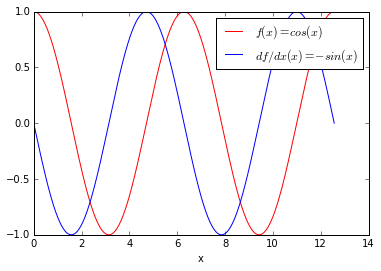

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, f, 'r')
plt.plot(x, df_dx, 'b')
plt.legend(("$f(x)=cos(x)$", "$df/dx(x) = -sin(x)$"))
plt.xlabel('x')

#### Examples: Integration

* For the Riemann sum approximation of an integral $F(x) = \int f(x) dx$:

$$F(x_n) \approx \sum_{i: x_i \le x_x} f_i \times \Delta x$$

* use **numpy.comsum(f, axis=None, out=None)**
* *axis* is the axis to work on (default is to *flatten* array and use all elements)

* Example: $f(x) = \cos(x) \Rightarrow F(x) = \sin(x)$

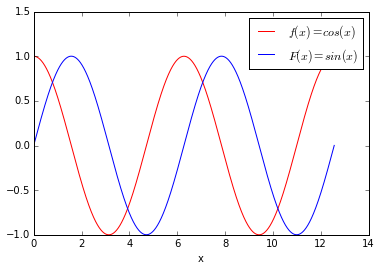

In [18]:
x = np.linspace(0, 4*np.pi, num=1e4)
dx = x[1] - x[0]  # All distances equal
  
f = np.cos(x)  
F = np.cumsum(f) * dx


np.testing.assert_array_almost_equal(F, np.sin(x), decimal=3)
plt.plot(x, f, 'r')
plt.plot(x, F, 'b')
plt.legend(("$f(x)=cos(x)$", "$F(x) = sin(x)$") )
plt.xlabel('x')

* For trapezoidal integration (over entire interval), use **numpy.trapz(f, x=None, dx=1.0, axis=-1)**
* give *x* **or** *dx* !

In [19]:
F = np.trapz(f, x=x)
print("Trapezoidal integration: {}".format( F ))

Trapezoidal integration: -5.551115123125783e-16


#### Examples: Vector and matrix multiplications

As noted above, all (standard) operations on a NumPy **array** are element-by-element.

To perform vector/matrix type of multiplications you can use the **numpy.dot(a, b)** and **numpy.cross(a, b)** methods.

Note: NumPy arrays also have **dot** as a *method*, see the example below

To recap:
* $a \cdot b = \sum_j a_j b_j$ (result is scalar)
* $a \times b = \sum_{j,k} \epsilon_{ijk} a_j b_k$ (result is 1D array)
* (Elements of $\epsilon_{ijk}$ is 1 if indexes in order or permutaded order, -1 if in reverse order and 0 if two indexes is the same: Ex. i=1, j=2, k=0 -> 1, i=2, j=1, k=0 -> -1, i,j=2, k=0 -> 0)

In [20]:
a = np.array([1., 2., 3.])
b = np.array([2., 1., 0.])
print("a = {}".format(a))
print("b = {}".format(b))
print()
print("a . b = {} (dot product)".format(np.dot(a, b)))
print("a x b = {} (cross product)".format(np.cross(a, b)))
print()
print("a . b = {}".format(a.dot(b)))
print()
print("a * b = {} (elementwise)".format(a * b))

a = [ 1.  2.  3.]
b = [ 2.  1.  0.]

a . b = 4.0 (dot product)
a x b = [-3.  6. -3.] (cross product)

a . b = 4.0

a * b = [ 2.  2.  0.] (elementwise)


Example: Perform matrix-vector type multiplication using one 2D and one 1D NumPy array:

In [21]:
A = np.arange(9).reshape((3,3))
b = np.linspace(1., 2., 3)

print("A =\n{}".format(A))
print("b = {}".format(b))
print()

c = A.dot(b)
print("c = A . b = {}".format(c))

A =
[[0 1 2]
 [3 4 5]
 [6 7 8]]
b = [ 1.   1.5  2. ]

c = A . b = [  5.5  19.   32.5]


Example: Perform matrix-matrix type multiplication using two 2D NumPy arrays:

In [22]:
A = np.arange(9).reshape((3,3))
B = np.random.randint(0,10,(3,3))
print("A =\n{}".format(A))
print("B =\n{}".format(B))
print()

C = A.dot(B)
print("C = A . B =\n{}".format(C))
print()
print("A * B =\n{}  (elementwise!)".format(A*B))

A =
[[0 1 2]
 [3 4 5]
 [6 7 8]]
B =
[[0 9 1]
 [8 1 7]
 [9 0 1]]

C = A . B =
[[ 26   1   9]
 [ 77  31  36]
 [128  61  63]]

A * B =
[[ 0  9  2]
 [24  4 35]
 [54  0  8]]  (elementwise!)


* For 2D arrays, you can get the transpose by using the "T" view, for example **B.T**
* Likewise you get the *conjugate* by using the **conjugate** or **conj** method


* For a more general transpose-like operation, have a look at the array- and NumPy- method **swapaxes** that gives you a view of your multi-dimensional array with any 2 axes swapped. (**B.T** is simply **B.swapaxes(0, 1)**!)

Using the *numpy.linalg* submodule you can perform additional operations on matrix-like arrays.
* **norm(A)**: matrix or vector norm (default 2-norm)
* **det(A)**: determinant of 2D equal dimensional arrays
* **solve(A, b)**: solves linear eq. $A \cdot \mathbf{x} = \mathbf{b}$
* **qr(A)** QR-factorization
* **inv(A)**, **pinv(A)**: matrix inverse and pseudo inverse
* **eig(A)**, **eigvals(A)**, **eigh(A)**, **eigvalsh(A)**: eigenvalues and eigenvectors of $A$, -h versions is for hermitian case $A^\dagger = A$
* **svd(A)**: Single-value decomposition

Example: inverse

In [23]:
import numpy.linalg as la

Binv = la.inv(B)

print("B =\n{}\n".format(B))
print("Binv =\n{}\n".format(Binv))

print("B . Binv = \n{}\n".format(B.dot(Binv)))
print("Binv . B = \n{}".format(Binv.dot(B)))

B =
[[0 9 1]
 [8 1 7]
 [9 0 1]]

Binv =
[[ 0.00205761 -0.01851852  0.12757202]
 [ 0.11316872 -0.01851852  0.01646091]
 [-0.01851852  0.16666667 -0.14814815]]

B . Binv = 
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.77555756e-17   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]

Binv . B = 
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   1.73472348e-17]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


For more information on these and for additional optional arguments, use the built-in help!

#### The NumPy *matrix* class

While there is a **numpy.matrix** class in NumPy, it is deprecated.

The examples below is shows how to use the **matrix** class for the examples above.

In [24]:
A = np.matrix(np.arange(9).reshape((3,3)))
b = np.linspace(1., 2., 3)
print("A =\n{}".format(A))
print("b = {}".format(b))
print()
C = A.dot(b)
print("C = {}".format(C))
print()
print(type(A), type(b), type(C))

A =
[[0 1 2]
 [3 4 5]
 [6 7 8]]
b = [ 1.   1.5  2. ]

C = [[  5.5  19.   32.5]]

<class 'numpy.matrixlib.defmatrix.matrix'> <class 'numpy.ndarray'> <class 'numpy.matrixlib.defmatrix.matrix'>


Note: C is now a 1x3 **matrix**, in the earlier example it was a numpy array!

In [25]:
A = np.mat(np.arange(9).reshape((3,3)))
B = np.mat(np.random.randint(0,10,(3,3)))
print("A =\n{}".format(A))
print("B =\n{}".format(B))
print()
C = A.dot(B)
print("C = A . B =\n{}".format(C))
C2 = A * B
print("C2 = A * B =\n{}".format(C2))

A =
[[0 1 2]
 [3 4 5]
 [6 7 8]]
B =
[[7 3 0]
 [0 0 4]
 [1 3 2]]

C = A . B =
[[ 2  6  8]
 [26 24 26]
 [50 42 44]]
C2 = A * B =
[[ 2  6  8]
 [26 24 26]
 [50 42 44]]


Note! For NumPy **matrix**, multiplication (*****) is matrix multiplication!

In [26]:
Binv = la.inv(B)

print("B =\n{}\n".format(B))
print("Binv =\n{}\n".format(Binv))

print("B * Binv = \n{}".format(B * Binv))
print("Binv * B = \n{}".format(Binv * B))

B =
[[7 3 0]
 [0 0 4]
 [1 3 2]]

Binv =
[[ 0.16666667  0.08333333 -0.16666667]
 [-0.05555556 -0.19444444  0.38888889]
 [ 0.          0.25        0.        ]]

B * Binv = 
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  2.77555756e-17   5.55111512e-17   1.00000000e+00]]
Binv * B = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


#### More NumPy!



There are many additional sub-packages and function in NumPy not covered here, ex. the modules **fft**, **random** and **polynomial**, for more information look at the built-in **help()** and the online material.

## Visualisation

The need to visualise results and data to give a better understanding of them in general is a very common task.

There exists a wide range of tools to create the images:
* Matlab
* Mathematica
* GNUplot
* R
* And of course many more commercial specialised plotting software

For Python the dominating packages are:
* Matplotlib - for 2D plotting (some support for 3D exists) : **matplotlib.pyplot**
* MayaVI - for 3D plotting : **mayavi.mlab**

Here we will only look into Matplotlib. While MayaVI is another package, many of the concepts are the same and should be relatively easy to grasp when you used Matplotlib.

More information on MayaVI can be found at http://code.enthought.com/projects/mayavi/

## Matplotlib

What is Matplotlib?

From the Matplotlib home-page (http://matplotlib.org/):

*Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MATLAB® or Mathematica®), web application servers, and six graphical user interface toolkits.*

*Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code. For a sampling, see the screenshots, thumbnail gallery, and examples directory.*

*For simple plotting the pyplot interface provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.*

In short: Matplotlib is designed to make simple things easy and advanced things possible!

### pyplot

The "main" module for plotting with Matplotlib is **matplotlib.pyplot**. 

This modules contain all the things you need to create figures, draw axes, plot results etc.

In all our examples we will import pyplot as *plt*.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

Note: the *"%matplotlib inline"* part is only needed for us to have the figures show up in this notebook. If you use pyCharm or other editors this line should not be present.

### Figures, axes and plots

To understand how to work with Matplotlib we need to know how Matplotlib constructs its images.

The "basic" object for all images is the **figure** object.

The figure object contains all the plots you create, as well as titles, axes etc.

You can create the figure object manually by using **matplotlib.pyplot.figure()**, or use the fact that it is created automatically when using most plotting-commands.

(remember: we import **matplotlib.pyplot** as **plt** in our examples)

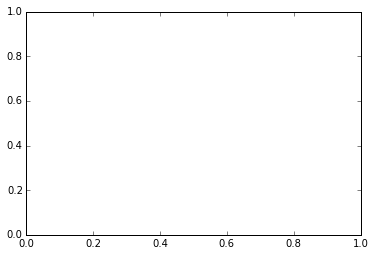

In [28]:
fig1 = plt.figure()
fig1.gca()  # Only needed for the ipython matplotlib-inline to display something
plt.show()

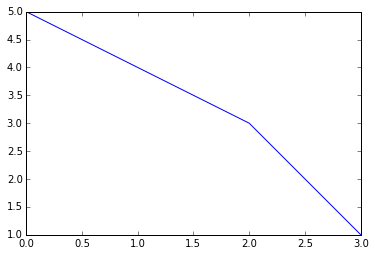

In [29]:
plt.plot([0,2,3],[5,3,1])

For plotting, you need an **axes** object (the gca() method in the example above retrieved the default axes for a figure).

If no axes was given, an axes object will automatically be created, like in the second example above.

(Image from the matplotlib homepage: http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure )
<img src="L4_matplotlib_fig_map.png">


For example, to work with subplots you _need_ an axis object.

### Subplots

To create subplots, you can either use basic pyplot routines:
* **matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, \*\*fig_kw)** - creates a figure and the axis objects for all subplots at once: *fig1, (ax1, ax2, ...)*
* **matplotlib.pyplot.subplot(\*args, \*\*kwargs)** - create a single axes object, typical uses are:
    * **subplot(nrows, ncols, plot_number)**, ex. **subplot(2, 1, 1)**
    * **subplot(211)**
    * Both these gives a 2 x 1 grid and points to the first subplot, much like in Matlab


(The **figure** keyword parameter *figsize* is used together with the pyplot method **figaspect()** to control the figure aspect ratio to fit the screen better in the examples below)

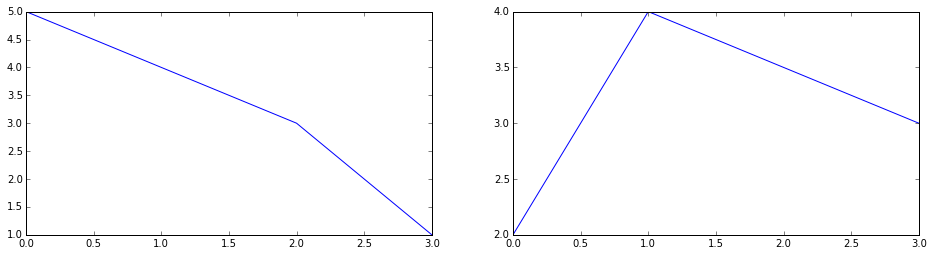

In [30]:
ar = 0.25
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=plt.figaspect(ar))

ax1.plot([0,2,3],[5,3,1])
ax2.plot([0,1,3],[2,4,3])

plt.show()

What is the reason to have the more complicated two-step method (first creating the figure and then the subplots one-by-one)?

Lets say you want to create a subplot-figure with 1 plot on the left and 2 on top of each other on the right:

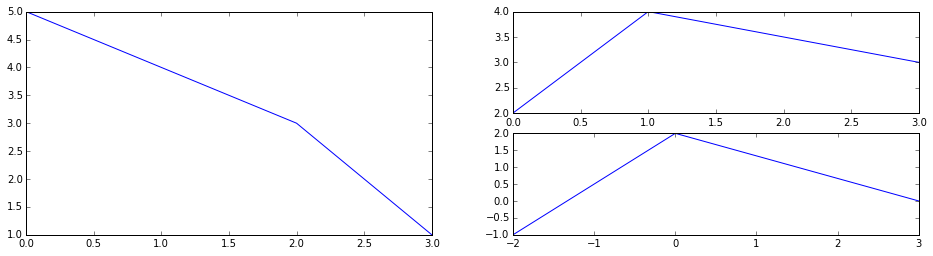

In [31]:
fig1 = plt.figure(figsize=plt.figaspect(ar))

ax1 = fig1.add_subplot(121)
ax1.plot([0,2,3],[5,3,1])

ax2 = fig1.add_subplot(2, 2, 2)
ax2.plot([0,1,3],[2,4,3])

ax3 = fig1.add_subplot(2, 2, 4)
ax3.plot([-2,0,3],[-1,2,0])
plt.show()

The solution: "Pretend" we have a 1 row 2 column layout for the first subplot, and chose position 1 (the leftmost for it). For the right part, "pretend" we have a 2 row 2 column layout and chose positions 2 and 4 (numbering goes from left to rigt from the top down).

For more advanced subplot layouts, consider looking at the subplot gridspec method, http://matplotlib.org/users/gridspec.html

### limits, legends, titles and more

Methods for the figure object, or for individual axis objects include:
* **title(title)**, **set_title(title)** - set plot title
* **grid(Bool)** - show grid or not
* **legend()** - add legend
* **text(string)** - add text to figure
* **savefig(filename)** - save figure to file (tries to create correct type based on suffix!)


* **set_xlim(left=None, right=None)** - adjust x limits
* **set_ylim(bottom=None, top=None)** - adjust y limits


* **set_xlabel(label)** - set x-label
* **set_ylabel(label)** - set y-label

* **set_xticks(ticks)** - specify where to put tick-marks along x-axis
* **set_xticklabels(labels)** - specify labels for the individual ticks
* **tick_params(...)** - modify how ticks and the labels are displayed


* ...

There are many more  possibilities available to modify your plots, see the online material and the "gallery" section on the the Matplotlib homepage for more information.

Note: For text in Matplotlib images, you can use raw strings with LaTeX-syntax to display symbols etc.

See the simple example below.

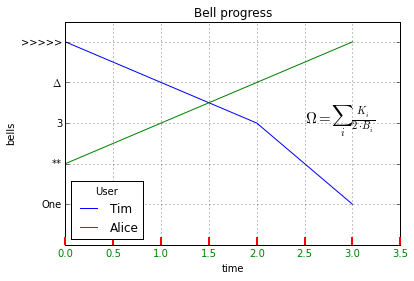

In [32]:
plt.plot([0,2,3], [5,3,1])
plt.plot([0,1,3], [2,3,5])
#plt.gcf().set_size_inches(plt.figaspect(ar))
plt.title('Bell progress')
ax1 = plt.gca()
ax1.set_xlim(right=3.5)
ax1.set_ylim(0., 5.5)
ax1.legend(('Tim', 'Alice'), loc='best', title='User')
ax1.set_xlabel('time')
ax1.tick_params(direction='in', axis='x', color='r', width=2, length=8, top=False, labelcolor='g')
ax1.set_ylabel('bells')
ax1.set_yticklabels(('', 'One', '**', 3, r'$\Delta$', '>>>>>'))
plt.text(2.5, 3., r'$\Omega = \sum_i \frac{K_i}{2 \cdot B_i}$', size=15)
plt.grid(True)
plt.savefig('my_plot.svg')

You can combine plots with completely different scales in one direction into one figure (or subplot) by using one the axis-methods **twinx()** or **twiny()**.

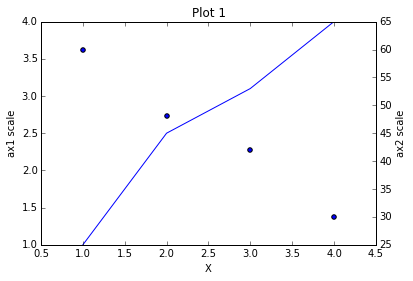

In [33]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([1, 2, 3, 4], [1, 2.5, 3.1, 4])
ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 48, 42, 30])
ax1.set_xlabel('X')
ax1.set_ylabel('ax1 scale')
ax2.set_ylabel('ax2 scale')
ax1.set_title('Plot 1')
plt.show()

### Colours, markers and linestyles

Colours, markers and linestyles can be specified using a Matlib-like notation for simple cases, ex. "r*-" to give a red line with *-markers at the points.

Colours can also be given using the **color=** keyword argument to many Matplotlib routines.

Colours can be specified in four major ways:
* Using the name (or the single letter version like above). Not only the standard color-names are supported but all the 140 names from the HTML/CSS specification! These can be found at http://www.w3schools.com/html/html_colornames.asp
* Using HTML/CSS hex string, such as '#0000FF' for blue
* By giving a grey level by passing a string representation of a number between 0 and 1. '0.0' representing black and '1.0' is white. I.e. '0.75' would be a lighter shade of grey.
* By specifying RGB (or RGBA) tuples. Ex. (1.0, 0.0, 0.0) would be red, (0.0, 0.0, 1.0, 0.5) a transparent blue. (Not specifying the alpha part implies a 1.0)

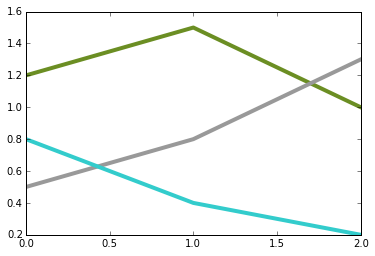

In [34]:
plt.plot([0, 1, 2], [1.2, 1.5, 1.0], color='OliveDrab', linewidth=4)
plt.plot([0, 1, 2], [0.5, 0.8, 1.3], color="0.6", linewidth=4)
plt.plot([0, 1, 2], [0.8, 0.4, 0.2], color=(0.2, 0.8, 0.8), linewidth=4)
plt.show()

Markers can also be specified using the **marker=** keyword argument.

Besides the pre-defined markers in the table below, you can also construct your own by specifying a list of xy-coordinates (relative to the center of the marker at (0,0) )!


marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

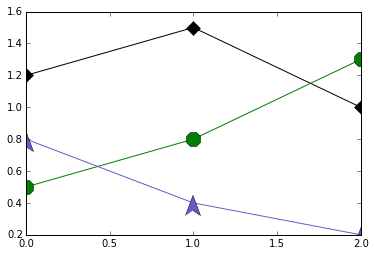

In [35]:
plt.plot([0, 1, 2], [1.2, 1.5, 1.0], 'kD-', markersize=10)
plt.plot([0, 1, 2], [0.5, 0.8, 1.3], color="green", marker="8", markersize=15)
plt.plot([0, 1, 2], [0.8, 0.4, 0.2], color='SlateBlue',
         marker=[(-3, -5), (0, 3), (3, -5), (0, -3)], markersize=25)
plt.show()

### Plot types

There is a wide range of plot types available in Matplotlib.

We have already show simple plotting using **plot** and **scatter**, but will show a few more and some more detail below.

#### Standard plot

The **plot()** method is very flexible and allows you to provide a very flexible input.
* **plot(x, y)** will plot the values in *x* and *y*. *x*, *y* can be single values or iterable items (list, tuples, NumPy arrays etc.) of coordinates
* **plot(x1, y1, x2, y2, ...)** will plot the sets of x-y:s at once in the same figure
* **plot(y)** will plot *y* with *x* as integers starting from 0

Common keyword arguments to **plot** include **color**, **linestyle**, **linewidth**, **marker**, **markersize**, **label** (will be shown by **legend**) and **fillstyle**.

Remember that you can use simple Matlab-like colour/marker/linestyle specifications as "rx-."!

Another example:

[[ 0.05  0.05]
 [ 0.4   0.3 ]
 [ 0.6   0.5 ]
 [ 0.7   0.55]
 [ 0.95  0.61]]


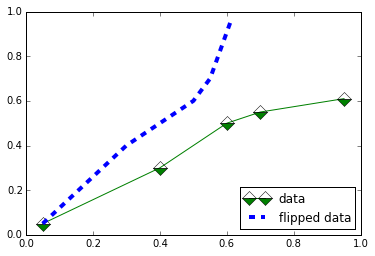

In [36]:
coord = np.array([[0.05, 0.05], [0.4, 0.3], [0.6, 0.5], [0.7, 0.55], [0.95, 0.61]])
print(coord)
plt.plot(coord[:,0], coord[:,1], 'g', label='data', fillstyle='bottom', marker='D', markersize=10)
plt.plot(coord[:,1], coord[:,0], 'b', label='flipped data', linestyle='--', linewidth=4)
plt.legend(loc='lower right')
plt.show()

#### Logarithmic plots

If you want one or both axis to be logarithmic, you can use **semilogx**, **semilogy** or **loglog** much in the same way as **plot**:

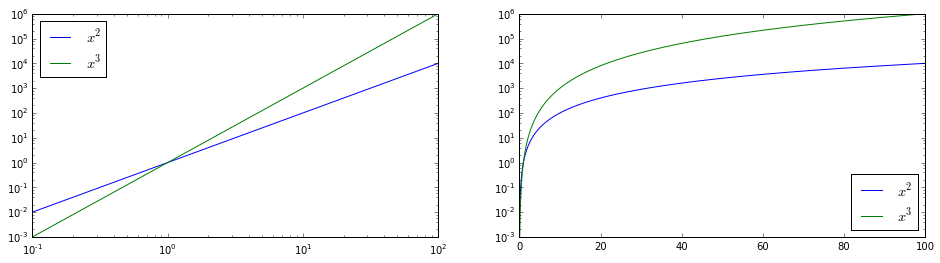

In [37]:
x = np.linspace(0, 100, num=1000)

fig1 = plt.figure(figsize=plt.figaspect(ar))

ax1 = fig1.add_subplot(121)
ax1.loglog(x, x**2, label=r'$x^2$')
ax1.loglog(x, x**3, label=r'$x^3$')
ax1.legend(loc='upper left', fontsize='x-large')

ax2 = fig1.add_subplot(122)
ax2.semilogy(x, x**2, label=r'$x^2$')
ax2.semilogy(x, x**3, label=r'$x^3$')
ax2.legend(loc='lower right', fontsize='x-large')

plt.show()

#### Error bars

For errorbars (or any other interval you want to show like an errorbar), use **errorbar(x, y, xerr=..., yerr=...)**

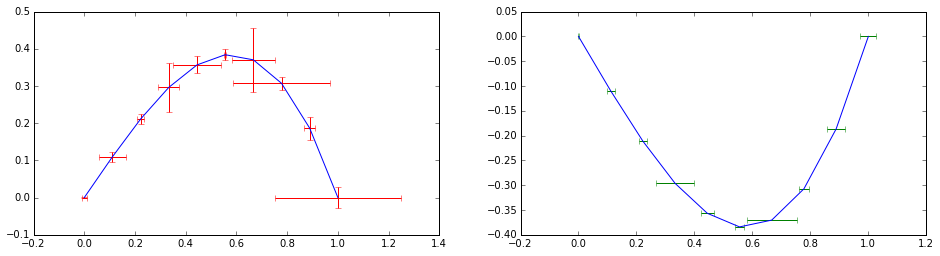

In [38]:
N = 10

x = np.linspace(0, 1, num=N)
y = x*(x-1)*(x+1)

xerror = np.random.normal(size=N, scale=0.1)
yerr = np.random.normal(size=N, scale=0.05)

fig1 = plt.figure(figsize=plt.figaspect(ar))

ax1 = fig1.add_subplot(121)
ax1.errorbar(x, -y, xerr=xerror, yerr=yerr, ecolor='r')

ax2 = fig1.add_subplot(122)
ax2.errorbar(x, y, xerr=yerr, ecolor='g')

plt.show()

#### Filled plots

You can create plots with filled areas between lines (or between a line and the x-axis) using **fill_between(x, y1, y2=)**:

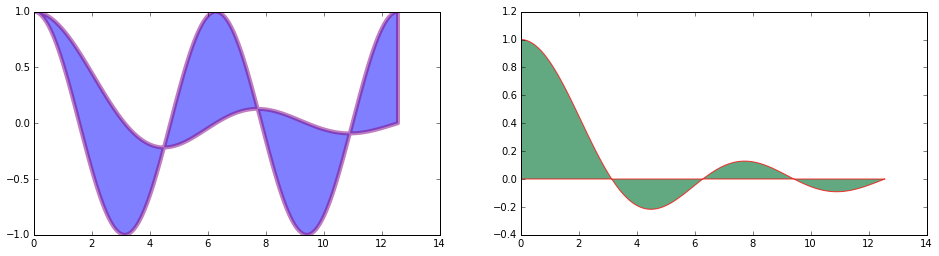

In [39]:
N = 1000
x = np.linspace(1e-10, 4*np.pi, num=N)
y1 = np.sin(x + np.pi*0.5)
y2 = np.sin(x) / x

fig1 = plt.figure(figsize=plt.figaspect(ar))

ax1 = fig1.add_subplot(121)
ax1.fill_between(x, y1, y2=y2, edgecolor='Purple', alpha=0.5, linewidth=4)

ax2 = fig1.add_subplot(122)
ax2.fill_between(x, y2, edgecolor='r', facecolor='SeaGreen', alpha=0.75)

plt.show()

#### Histograms

You create histograms using **hist(y, bins=10, normed=False, histtype= ...)**

Have a look at the built-in help or online documentation for many more options!

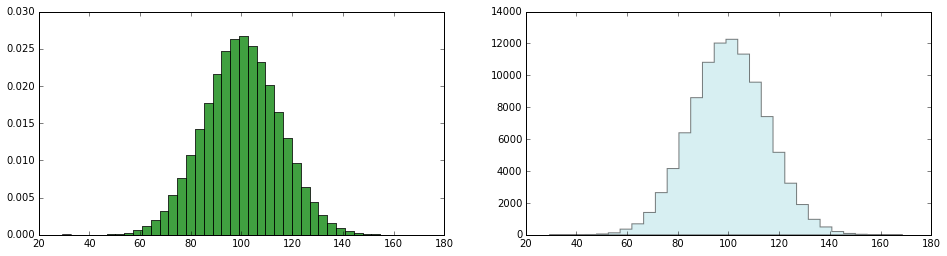

In [40]:
x = 100 + 15 * np.random.randn(1e5)

fig1 = plt.figure(figsize=plt.figaspect(ar))

ax1 = fig1.add_subplot(121)
ax1.hist(x, bins=40, normed=True, facecolor='g', alpha=0.75)

ax2 = fig1.add_subplot(122)
ax2.hist(x, bins=30, histtype='stepfilled', facecolor='PowderBlue', alpha=0.5)

plt.show()

#### Contour plots

You can create filled and non-filled contour plots using **contourf** and **contour** respectively.

To specify colour-map, use the **cmap=** keyword argument. (These can be found in the **matplotlib.pyplot.cm** module, try **dir(plt.cm)** to see what is available)

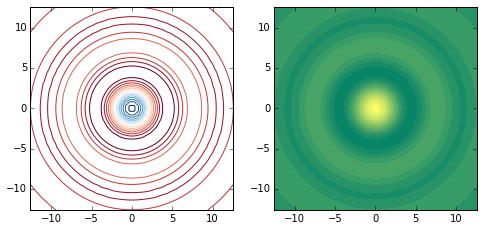

In [41]:
x = np.linspace(-4*np.pi, 4*np.pi)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / R

plt.figure(figsize=plt.figaspect(0.5))

plt.subplot(121)
plt.contour(X, Y, Z, 15, cmap=plt.cm.RdBu)
plt.axis('image')

plt.subplot(122)
plt.contourf(X, Y, Z, 15, cmap=plt.cm.summer)
plt.axis('image')

plt.show()

#### Simple 3D plotting

To contruct 3D-plots with Matplotlib, you additional need to import an extra axes object:

**from mpl_toolkits.mplot3d import Axes3D**

Now, by providing the **projection='3d'** keyword argument when creating axes, you will be able to plot 3D-data!

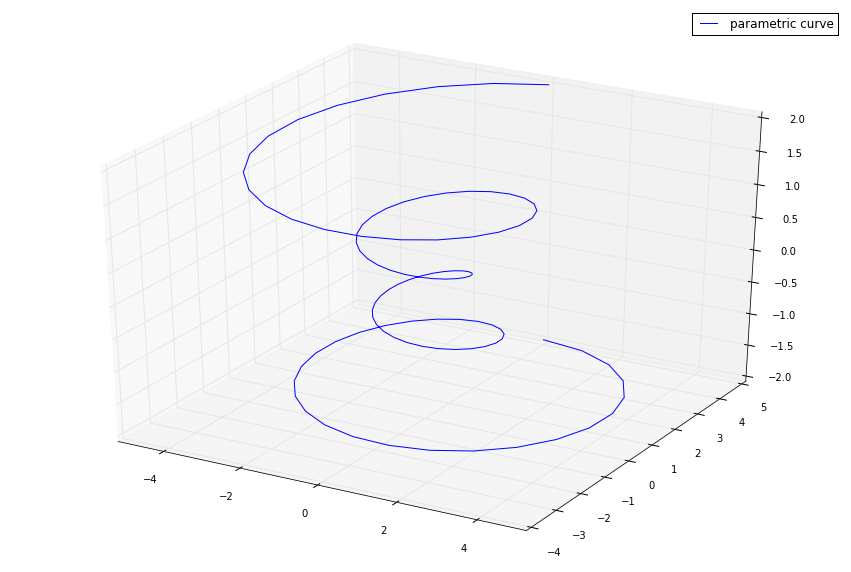

In [42]:
theta = np.linspace(-4, 4, num=100)
z = 0.5*theta; r = z**2 + 1
x = r * np.sin(np.pi*theta)
y = r * np.cos(np.pi*theta)

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15,10))

plt.subplot(1,1,1, projection='3d')
plt.plot(x, y, z, label='parametric curve')
plt.legend()
plt.show()

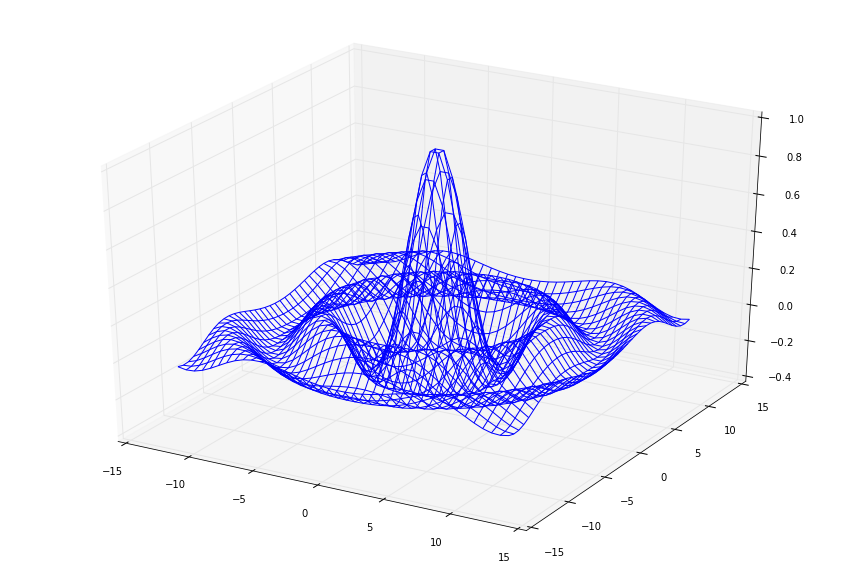

In [43]:
x = np.linspace(-4*np.pi, 4*np.pi, num=40)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / R

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d')

ax.plot_wireframe(X, Y, Z)

plt.show()

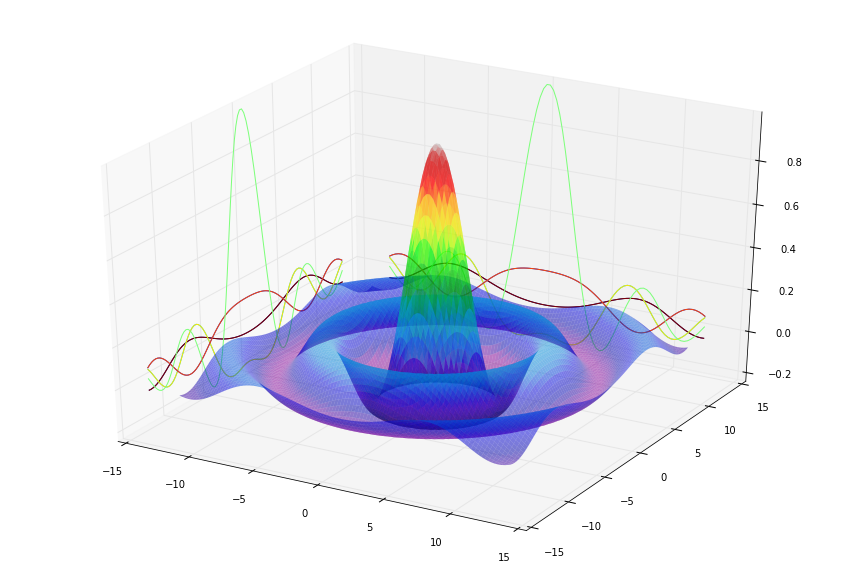

In [44]:
x = np.linspace(-4*np.pi, 4*np.pi, num=100)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) / R

plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, cmap=plt.cm.spectral, rstride=1, cstride=1, alpha=.5, linewidth=0)

ax.contour(X, Y, Z, zdir='y', offset=15)
ax.contour(X, Y, Z, zdir='x', offset=-15)

ax.set_ylim(-15, 15)
ax.set_xlim(-15, 15)

plt.show()

### Matplotlib collections

If you want to plot a large number of elements it is somewhat inefficient to plot them one by one using the methods shown above.

To remedy this Matplotlib have a **collections** submodule that helps in collecting many objects of the same type that can be used efficiently when drawing images.

There are collection-types for polygons, lines, triangular meshes, paths and more.

For example the **matplotlib.collections** **LineCollection(segments, ...)** gathers segments of lines for convinient plotting of many line-segments.
* **segments** is a sequence of (line0, line1, line2), where:
* **lineX** is a sequence of coordinates, i.e. lineX = (x0, y0), (x1, y1), ... (xm, ym)

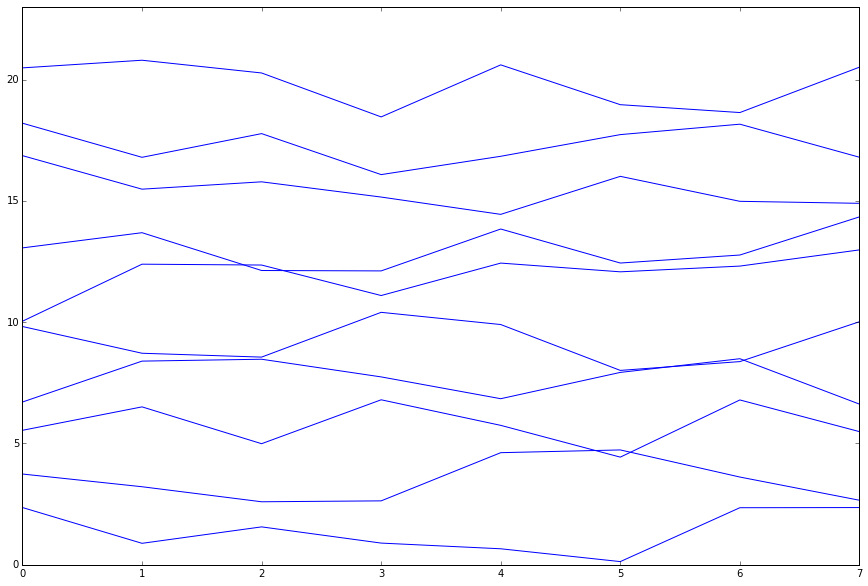

In [45]:
Ny = 10
x = np.arange(8)

# Ny lines where y is randoms between 0 and 2 * Ny + 3
from random import random
lines = []
for i in np.arange(Ny):
    line = []
    for xj in x:
        y = random() * 3 + 2 * i
        line.append( (xj, y) )
        #print(line)
    lines.append(line)
    
from matplotlib.collections import LineCollection
line_segments = LineCollection(lines)

fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax.add_collection(line_segments)
ax.set_ylim((0, 2*Ny+3))
ax.set_xlim((0, np.amax(x)))
plt.show()

This ends this short introduction to matplotlib.
For more examples and documentation, go to the Matplotlib homepage.

For advanced 3D plotting, I recommend you to have a look at MayaVI!